<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Machine_Learn_methods_enseble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datascience
!pip install -q pandas-profiling

     |████████████████████████████████| 69 kB 2.7 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as sp
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [3]:
path = '/content/drive/MyDrive/diabetes.xlsx'

In [4]:
!pip3 uninstall openpyxl
!pip3 install openpyxl 

Found existing installation: openpyxl 3.0.9
Uninstalling openpyxl-3.0.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/openpyxl-3.0.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/openpyxl/*
Proceed (y/n)? y
  Successfully uninstalled openpyxl-3.0.9
  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)


In [5]:
df = pd.read_excel(path)

In [6]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.shape

(768, 9)

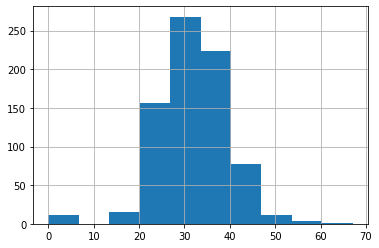

In [8]:
df['BMI'].hist()

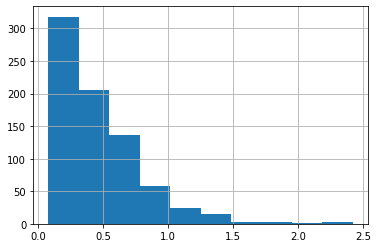

In [9]:
df['DiabetesPedigreeFunction'].hist()

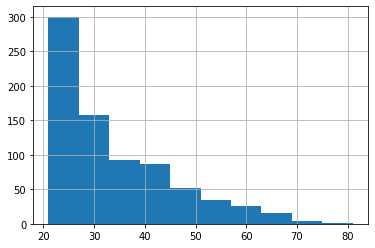

In [10]:
df['Age'].hist()

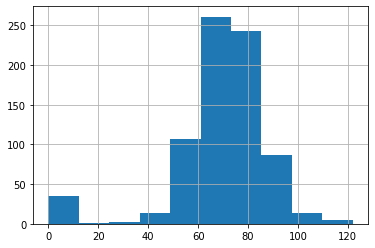

In [11]:
df['BloodPressure'].hist()

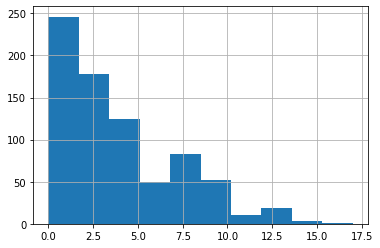

In [12]:
df['Pregnancies'].hist()

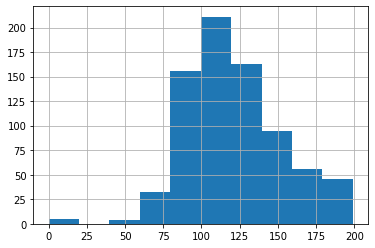

In [13]:
df['Glucose'].hist()

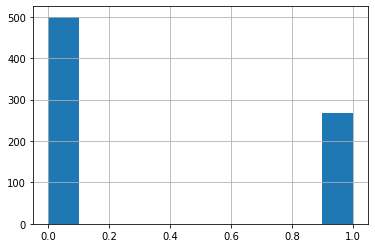

In [14]:
df['Outcome'].hist()

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [18]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [19]:
#Replacing the zero values for Blood Pressure
df1 = df.loc[df['Outcome'] ==1]
df2 = df.loc[df['Outcome'] ==0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [20]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,27,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
245,9,184,85,15,0,30.0,1.213,49,1
254,12,92,62,7,258,27.6,0.926,44,1
255,1,113,64,35,0,33.6,0.543,21,1
259,11,155,76,28,150,33.3,1.353,51,1


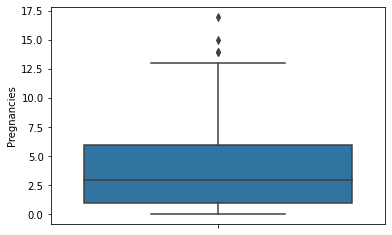

In [21]:
sns.boxplot(y='Pregnancies', data=df, showfliers = True)